# Data preprocssing for covid-19 dataset
https://ourworldindata.org/covid-vaccinations

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
covid_vaccination_world_data = pd.read_csv("./owid-covid-data.csv", encoding='latin-1')
covid_vaccination_data = pd.read_csv("./covid-19_vaccination_US_Data_2020-2022.csv", encoding='latin-1')
print(covid_vaccination_data.columns.tolist())
# usa_vaccination_data = covid_vaccination_data[covid_vaccination_data['iso_code'] == 'USA']
# usa_vaccination_data = usa_vaccination_data[usa_vaccination_data['date'] >= '2020-01-01']
# usa_vaccination_data = usa_vaccination_data[usa_vaccination_data['date'] <= '2022-12-31']

# output_file_name = "covid-19_vaccination_US_Data_2020-2022.csv"
# usa_vaccination_data.to_csv(output_file_name, index=False)

# print(usa_vaccination_data.shape)

['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

## Total cases in the world

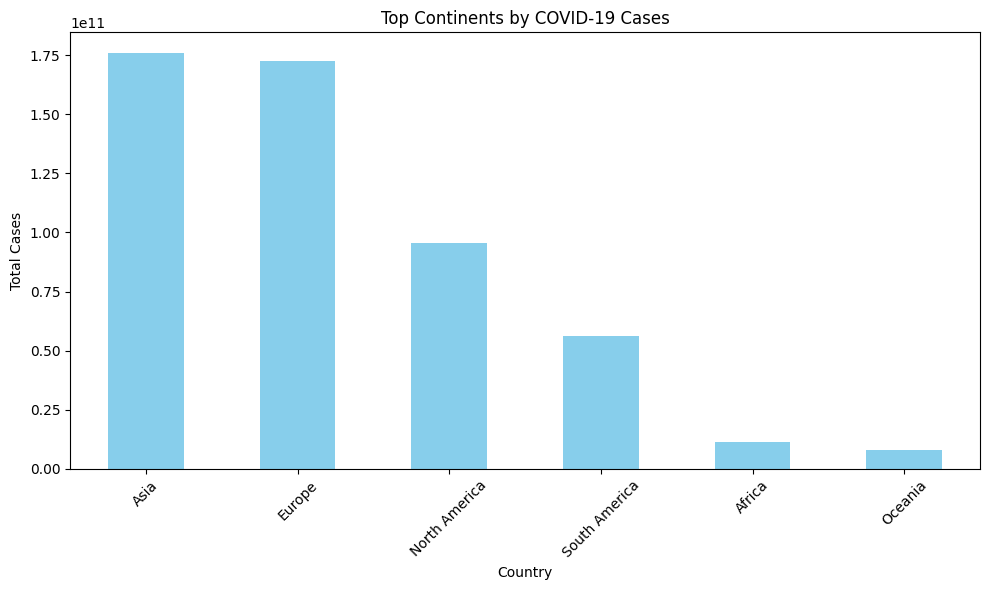

In [6]:
top_countries = covid_vaccination_world_data.groupby('continent')['total_cases'].sum().nlargest(10)  # Top 10 countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Continents by COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Showing total deaths using pie chart

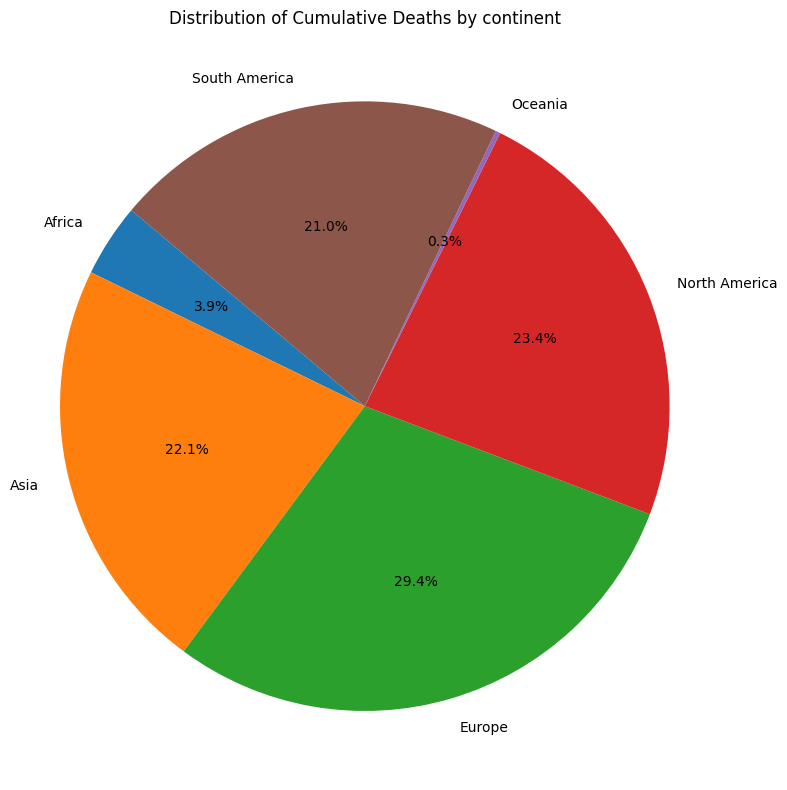

In [7]:
region_deaths = covid_vaccination_world_data.groupby('continent')['total_deaths'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cumulative Deaths by continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

## Visualization of Covid-19 data grouping total Covid-19 cases and total Vaccination doses

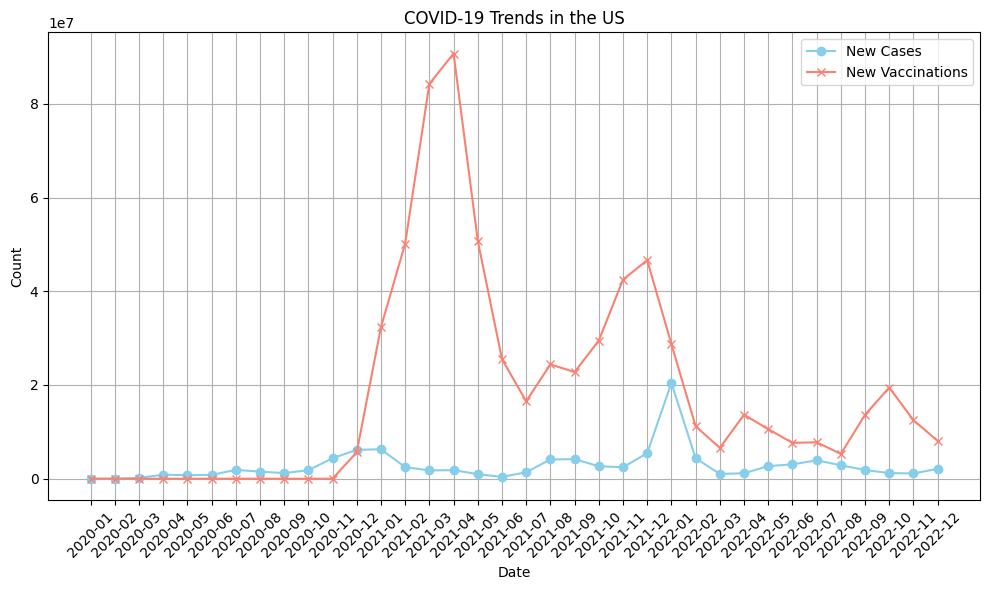

In [8]:
covid_vaccination_data['date'] = pd.to_datetime(covid_vaccination_data['date'])
covid_vaccination_data['Month'] = covid_vaccination_data['date'].dt.to_period('M')

monthly_data = covid_vaccination_data.groupby('Month')[['new_cases', 'new_vaccinations', 'new_deaths']].sum()
monthly_data = monthly_data.reset_index() 

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_cases'], label='New Cases', color='skyblue', marker='o')
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_vaccinations'], label='New Vaccinations', color='salmon', marker='x')
# plt.plot(monthly_data['Month'].astype(str), monthly_data['new_deaths'], label='New Deaths', color='blue', marker='+')
plt.title('COVID-19 Trends in the US')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualization of Covid-19 total deaths in period of 2020-01-01 to 2022-12-31

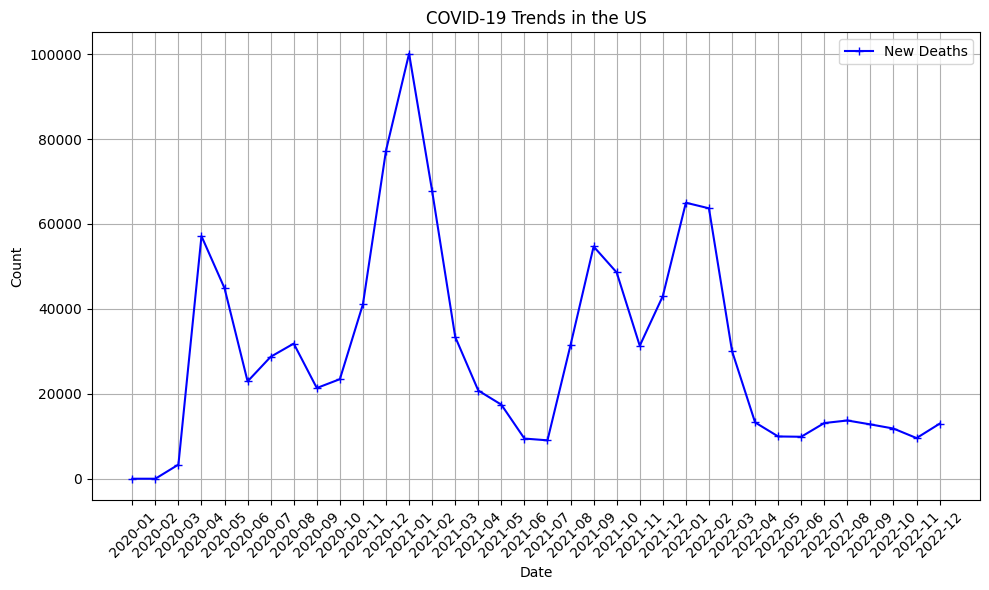

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Month'].astype(str), monthly_data['new_deaths'], label='New Deaths', color='blue', marker='+')
plt.title('COVID-19 Trends in the US')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dharm\AppData\Local\Temp\ipykernel_48964\2786905341.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


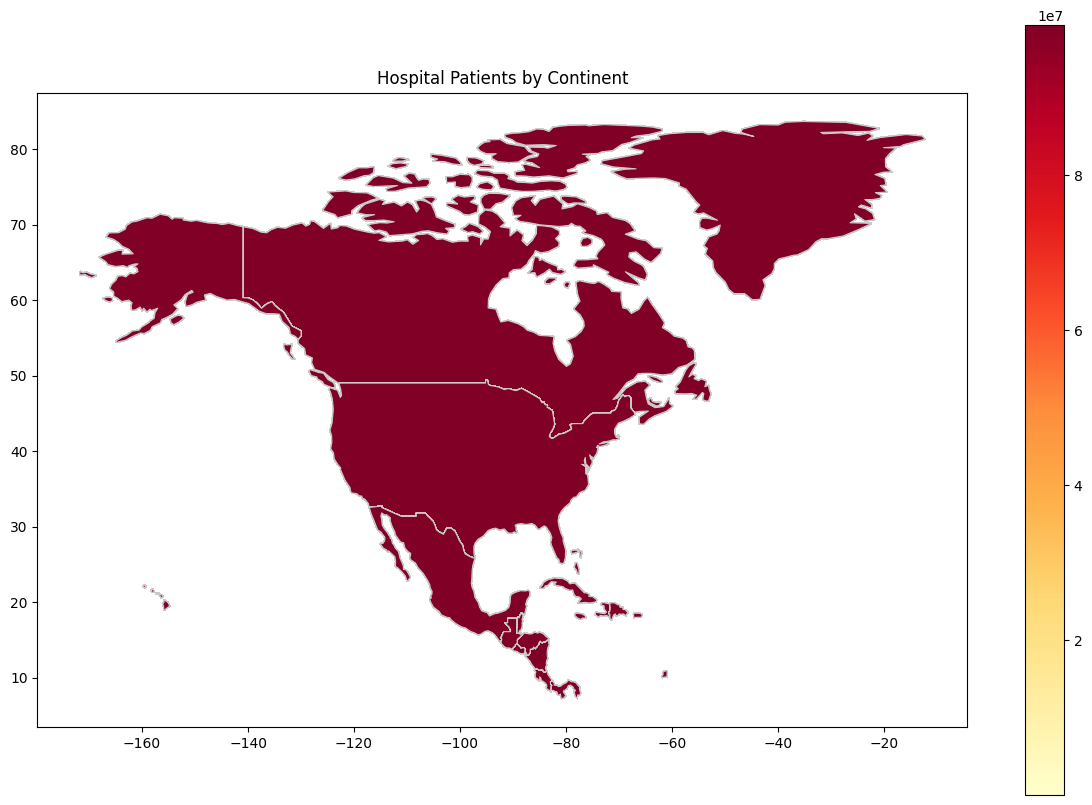

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the owid-covid-data.csv file
covid_data = pd.read_csv("covid-19_vaccination_US_Data_2020-2022.csv")

# Filter the data for hospital patients
hosp_patients = covid_data[['continent', 'total_cases']]

# Merge with the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(hosp_patients, left_on='continent', right_on='continent')

# Plot the data on a world map
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='total_cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Hospital Patients by Continent')
plt.show()

In [11]:
df1 = pd.read_csv("./cleaned_vers_data_covid19_vaccine_2020-2022.csv", encoding='latin-1')
# df2 = pd.read_csv("C:/Users/rutub/OneDrive/Desktop/Fall 2023/Comp4710/COMP4710-World-Vaccine-Adverse-Reactions/cleaned_vers_data_2021.csv", encoding='latin-1')
# df3 = pd.read_csv("C:/Users/rutub/OneDrive/Desktop/Fall 2023/Comp4710/COMP4710-World-Vaccine-Adverse-Reactions/cleaned_vers_data_2021.csv", encoding='latin-1')


print(df1.columns.tolist())

['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'SEX', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'V_ADMINBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4']


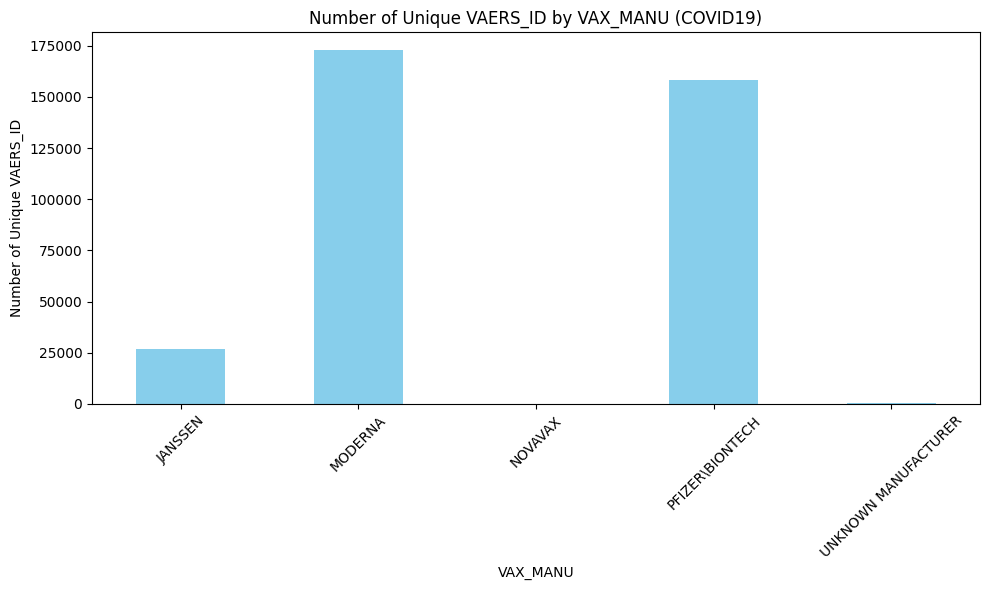

In [12]:


# Read the cleaned_vers_data_2020.csv file
cleaned_vers_data_2020 = pd.read_csv("cleaned_vers_data_covid19_vaccine_2020-2022.csv")

# Filter the data for VAX_TYPE = 'COVID19'
covid19_data = cleaned_vers_data_2020[cleaned_vers_data_2020['VAX_TYPE'] == 'COVID19']

# Group the data by VAX_MANU and count the number of unique VAERS_ID
vax_manu_counts = covid19_data.groupby('VAX_MANU')['VAERS_ID'].nunique()

# Plot the data
plt.figure(figsize=(10, 6))
vax_manu_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique VAERS_ID by VAX_MANU (COVID19)')
plt.xlabel('VAX_MANU')
plt.ylabel('Number of Unique VAERS_ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# # Read the owid-covid-data.csv file
# covid_data = pd.read_csv("owid-covid-data.csv")

# # Filter the data for hospital patients
# hosp_patients = covid_data[['continent', 'total_cases']]

# # Merge with the world shapefile
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# merged = world.merge(hosp_patients, left_on='continent', right_on='continent')

# # Plot the data on a world map
# fig, ax = plt.subplots(figsize=(15, 10))
# merged.plot(column='total_cases', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# ax.set_title('Total Cases by Continent')
# plt.show()
